<a href="https://colab.research.google.com/github/razaq2817/Autonomous-Vehicles-and-Robotics/blob/main/Autonomous_Vehicles_and_Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Vehicle Path from Start to Destination ---
(1, 1)
(2, 2)
(3, 2)
(4, 3)
(5, 4)
(6, 4)
(7, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)


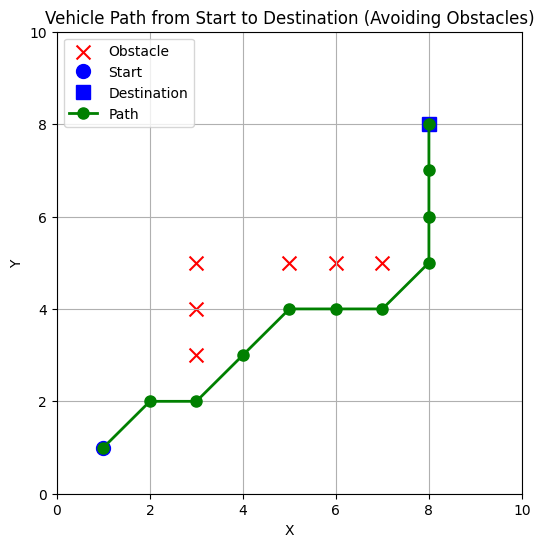

In [1]:
import matplotlib.pyplot as plt
import heapq

# Grid size and obstacles
grid_size = 10
obstacles = [(3, 3), (3, 4), (3, 5), (5, 5), (6, 5), (7, 5)]

# Start and destination
start = (1, 1)
end = (8, 8)

# Directions for movement (up, down, left, right, and diagonals)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]

# A* algorithm to find the path
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(start, end, obstacles):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, end), 0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_list:
        _, current_g, current = heapq.heappop(open_list)

        if current == end:
            # Reconstruct the path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g_score = current_g + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                    heapq.heappush(open_list, (f_score[neighbor], tentative_g_score, neighbor))

    return None  # No path found

# Get the path using A* algorithm
path = a_star(start, end, obstacles)

# Print the path
print("\n--- Vehicle Path from Start to Destination ---")
if path:
    for step in path:
        print(step)
else:
    print("No path found!")

# Plotting the grid with obstacles, start, end, and path
plt.figure(figsize=(6, 6))

# Plot obstacles in red
obstacle_x, obstacle_y = zip(*obstacles)
plt.scatter(obstacle_x, obstacle_y, c='red', label='Obstacle', s=100, marker='x')

# Plot start point in blue
plt.plot(start[0], start[1], 'bo', markersize=10, label='Start')

# Plot destination point in green
plt.plot(end[0], end[1], 'bs', markersize=10, label='Destination')

# Plot the path in green
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, 'go-', linewidth=2, markersize=8, label='Path')

# Setting the grid and plot labels
plt.grid(True)
plt.title("Vehicle Path from Start to Destination (Avoiding Obstacles)")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.show()